<a href="https://colab.research.google.com/github/gelechi/Gloze/blob/main/Copy_of_4_Competitor_web_scraping_Review_SMo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 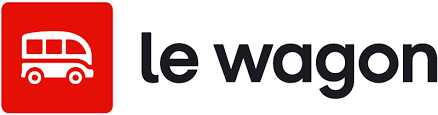

# Get competitor's products and prices info

Naturalia is a health food French company, and one of the main competitors of Greenweez.

In this challenge, you will gather information on Naturalia products to help Greenweez drive its pricing strategy.

## Naturalia website

### BeautifulSoup


Go to the [website](https://www.naturalia.fr/catalogsearch/result/?q=compote) and study the url. What is the endpoint? What is the query parameter ?

> **Your Answer Here (Double click)**


Using `requests` and `bs4`libraries, convert the html code to a BeautifulSoup object and store it in a `soup`variable.

Have a look at the lecture if you're unsure about the syntax.

In [1]:
#your code here
import requests
from bs4 import BeautifulSoup

url='https://www.naturalia.fr/catalogsearch/result/?q=compote'



In [2]:
response = requests.get(url)
response

<Response [200]>

In [3]:
response.encoding

'UTF-8'

In [4]:
soup = BeautifulSoup(response.text, "html.parser")

### Investigating the page layout


We want to get information about all the products displayed on the page.

By examining the website's HTML code, determine the HTML tag that contains information for each product.

> **Your Answer Here (Double click)**


Use BeautifulSoup's `find_all()` method to retrieve all **li** tags with the class **item product product-item** and store the results in a variable named `items`.

Have a look at the lecture for guidance.

In [7]:
#your code here

items = soup.find_all("li", {"class":"item product product-item"})


What is the type of `items`?


In [8]:
type(items)

bs4.element.ResultSet

> **Your Answer Here (Double click)**


### Scraping one product information


Store the first item in a variable named `item`.

In [9]:
#your code here
item = items[0]
item

<li class="item product product-item"> <div class="product-item-info" data-container="product-grid">
<p class="product name product-item-name">
<a class="product-item-link" href="https://www.naturalia.fr/produit/compote-fraise-315g">
                                                        Compote Fraise 315g Bio                         </a>
</p>
<p class="product-item-brand">
                        Coteaux Nantais                    </p>
<div class="products-content">
<div class="product-item-photo">
<a class="product photo" href="https://www.naturalia.fr/produit/compote-fraise-315g" tabindex="-1">
<span class="product-image-container product-image-container-43929">
<span class="product-image-wrapper">
<img alt="Compote Fraise 315G Bio" class="product-image-photo" height="233" loading="lazy" src="https://media.naturalia.fr/media/catalog/product/cache/c97961dbe2ef8ae9072b778469b58f9a/0/3/03301594000726_a1c1.jpg" width="233"/></span>
</span>
<style>.product-image-container-43929 {
    w

HTML can be tough to decipher when reading it in the notebook.

Use your browser's console to identify the HTML tag storing the product information (name and url) of the first item. \
Extract it with BeautifulSoup and store the results in a variable named `item_description`.

In [ ]:
#find the tag that contains the product name and the url


Now extract the name and url from `item_description`and store them in two variables named `item_name` and `item_url`.


In [10]:
#store the product name

name = item.find("a").text.strip()
name


'Compote Fraise 315g Bio'

In [11]:
#store the product url
url = item.find("a").get("href")


In [ ]:
item.find("a").attrs["href"]

'https://www.naturalia.fr/produit/compote-fraise-315g'

Repeat the same process to extract the price of the first item, and store it in a variable named `item_price`.


<details>
    <summary>Hint 🔍</summary>

You will be required to do some cleaning with the output, including:
    
- get rid of the unnecessary characters (`strip()`and `replace()` methods can help)
- change the data type

</details>

<span class="price">5,90 €</span>

In [12]:
item.find_all("span", {"class":"price"})

[<span class="price">5,90 €</span>]

In [13]:
#your code here
len(item.find_all("span"))

5

In [ ]:
item.find("span", {"class":"price"})

<span class="price">5,90 €</span>

In [14]:
item.find("span", {"class":"price"}).text

'5,90\xa0€'

In [15]:
price_text = float(item.find("span", {"class":"price"}).text[:4].replace(",", "."))
price_text

5.9

In [16]:
float(price_text)

5.9

In [17]:
#Example of REGEX
import re
re_string= "\d{1,4}[,\.]\d{1,2}"
price_text = item.find("span", {"class":"price"}).text
re.findall(re_string,price_text)

['5,90']

### Scraping all products information

We will now repeat the process to gather the information of all the products displayed on the page.

By re-using your previous code, iterate over all the products and create a list of dictionaries containg all the products information (product name, price and url).

Complete the following code and execute it.

In [18]:
items

[<li class="item product product-item"> <div class="product-item-info" data-container="product-grid">
 <p class="product name product-item-name">
 <a class="product-item-link" href="https://www.naturalia.fr/produit/compote-fraise-315g">
                                                         Compote Fraise 315g Bio                         </a>
 </p>
 <p class="product-item-brand">
                         Coteaux Nantais                    </p>
 <div class="products-content">
 <div class="product-item-photo">
 <a class="product photo" href="https://www.naturalia.fr/produit/compote-fraise-315g" tabindex="-1">
 <span class="product-image-container product-image-container-43929">
 <span class="product-image-wrapper">
 <img alt="Compote Fraise 315G Bio" class="product-image-photo" height="233" loading="lazy" src="https://media.naturalia.fr/media/catalog/product/cache/c97961dbe2ef8ae9072b778469b58f9a/0/3/03301594000726_a1c1.jpg" width="233"/></span>
 </span>
 <style>.product-image-containe

In [19]:
products = []
for item in items:
  name = item.find("a").text.strip()
  url = item.find("a").get("href")
  price = float(item.find("span", {"class":"price"}).text[:4].replace(",", "."))

  product = {"Name":name,
             "URL": url,
             "Price":price}
  products.append(product)

In [20]:
import pandas as pd

In [21]:
pd.DataFrame(products)

,Name,URL,Price
0,Compote Fraise 315g Bio,https://www.naturalia.fr/produit/compote-frais...,5.90
1,Compote de Pêche allégée 540g Bio,https://www.naturalia.fr/produit/compote-peche...,7.49
2,Compote Pommes Family 935g Bio,https://www.naturalia.fr/produit/compote-pomme...,5.95
3,Compote Abricot 725G Bio,https://www.naturalia.fr/produit/compote-abric...,8.75
4,Compote Pomme Poire Maxi Format 1.050kg Bio,https://www.naturalia.fr/produit/puree-pomme-p...,8.65
5,Compote de Pomme Maxi Format 1.050kg Bio,https://www.naturalia.fr/produit/puree-pomme-1...,6.95
6,Compote de pomme & châtaigne 4x100G Bio,https://www.naturalia.fr/produit/compot-pomme-...,4.95
7,Purée de carotte en gourde 120g Bio,https://www.naturalia.fr/produit/gourde-puree-...,1.85
8,Purée de Pomme et Banane sans sucres ajoutés 7...,https://www.naturalia.fr/produit/puree-pomme-b...,5.95
9,Gourdes Fruits à boire 12M 8x120Ml Bio,https://www.naturalia.fr/produit/gourdes-fruit...,12.50


from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
names = []
urls = []
prices =[]
for item in items:
  name = item.find("a").text.strip()
  url = item.find("a").get("href")
  price = float(item.find("span", {"class":"price"}).text[:4].replace(",", "."))

  names.append(name)
  urls.append(url)
  prices.append(price)



In [23]:
pd.DataFrame({"Name":names, "URL":urls, "Price":prices})

,Name,URL,Price
0,Compote Fraise 315g Bio,https://www.naturalia.fr/produit/compote-frais...,5.90
1,Compote de Pêche allégée 540g Bio,https://www.naturalia.fr/produit/compote-peche...,7.49
2,Compote Pommes Family 935g Bio,https://www.naturalia.fr/produit/compote-pomme...,5.95
3,Compote Abricot 725G Bio,https://www.naturalia.fr/produit/compote-abric...,8.75
4,Compote Pomme Poire Maxi Format 1.050kg Bio,https://www.naturalia.fr/produit/puree-pomme-p...,8.65
5,Compote de Pomme Maxi Format 1.050kg Bio,https://www.naturalia.fr/produit/puree-pomme-1...,6.95
6,Compote de pomme & châtaigne 4x100G Bio,https://www.naturalia.fr/produit/compot-pomme-...,4.95
7,Purée de carotte en gourde 120g Bio,https://www.naturalia.fr/produit/gourde-puree-...,1.85
8,Purée de Pomme et Banane sans sucres ajoutés 7...,https://www.naturalia.fr/produit/puree-pomme-b...,5.95
9,Gourdes Fruits à boire 12M 8x120Ml Bio,https://www.naturalia.fr/produit/gourdes-fruit...,12.50


from matplotlib import pyplot as plt
_df_2['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
pd.DataFrame({"colum1":[1,2,3], "column2":[4,5,6]})

,colum1,column2
0,1,4
1,2,5
2,3,6


from matplotlib import pyplot as plt
_df_9['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['colum1'].plot(kind='hist', bins=20, title='colum1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['column2'].plot(kind='hist', bins=20, title='column2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='index', y='colum1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='colum1', y='column2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['colum1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'colum1'}, axis=1)
              .sort_values('colum1', ascending=True))
  xs = counted['colum1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('colum1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('colum1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['column2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'column2'}, axis=1)
              .sort_values('column2', ascending=True))
  xs = counted['column2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('column2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('column2')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_17['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['colum1'].plot(kind='line', figsize=(8, 4), title='colum1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['column2'].plot(kind='line', figsize=(8, 4), title='column2')
plt.gca().spines[['top', 'right']].set_visible(False)

Congratulations! You just scraped your first web page using Python! 🤖